# Use Case 2: Comparing Clinical Attributes

## Step 1: Importing packages and setting up your notebook.

The primary objective of this use case is to access, manipulate, and visualize data from the clinical dataframe. We'll use endometrial cancer data from the CPTAC to compare FIGO stage--a standard measure of uterine cancer progression--with BMI to determine if there's a correlation.

Firstly, we import standard data analysis libraries along with the seaborn library for visualization:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

The cptac package provides our cancer data and various accessory functions:

In [2]:
import cptac
en = cptac.Ucec()

## Step 2: Getting data

We call the en.get_clinical() method to load the clinical results dataframe. To understand the clinical attributes available for analysis, let's print out the column names:

In [3]:
clinical_data = en.get_clinical('mssm')
print(clinical_data.columns.to_list()) # a ton of data columns

['tumor_code', 'discovery_study', 'type_of_analyzed_samples', 'confirmatory_study', 'type_of_analyzed_samples', 'age', 'sex', 'race', 'ethnicity', 'ethnicity_race_ancestry_identified', 'Inferred ancestry', 'collection_in_us', 'participant_country', 'maternal_grandmother_country', 'maternal_grandfather_country', 'paternal_grandmother_country', 'paternal_grandfather_country', 'deaf_or_difficulty_hearing', 'blind_or_difficulty_seeing', 'difficulty_concentrating_remembering_or_making_decisions', 'difficulty_walking_or_climbing_stairs', 'difficulty_dressing_or_bathing', 'difficulty_doing_errands', 'consent_form_signed', 'case_stopped', 'tumor_site', 'tumor_site_other', 'tumor_laterality', 'tumor_focality', 'tumor_size_cm', 'histologic_type', 'histologic_grade', 'tumor_necrosis', 'margin_status', 'ajcc_tnm_cancer_staging_edition_used', 'pathologic_staging_primary_tumor_pt', 'pathologic_staging_regional_lymph_nodes_pn', 'number_of_lymph_nodes_examined', 'number_of_lymph_nodes_positive_for_tum

Please note, not all variables are tracked for every patient, and the dataset may contain a significant amount of variables.

## Step 3: Investigating the data

Before delving deeper, let's examine this dataframe one variable at a time. This helps identify potential patterns, outliers, or inconsistencies that might affect our subsequent analysis.

For categorical data, use the df.unique() and df.value_counts() functions to examine the data's unique attributes and their frequencies:

In [4]:
clinical_data['tumor_stage_pathological'].unique()
clinical_data['tumor_stage_pathological'].value_counts()

tumor_stage_pathological
Stage I      76
Stage III    15
Stage II      9
Stage IV      3
Name: count, dtype: int64

For continuous data, determine the average value, range, and other statistics to understand the data's distribution:

In [5]:
print(f"The minimum tumor size is {clinical_data['tumor_size_cm'].min()}")
print(f"The maximum tumor size is {clinical_data['tumor_size_cm'].max()}")
print(f"The average tumor size is {clinical_data['tumor_size_cm'].mean()}")

The minimum tumor size is 0.0
The maximum tumor size is 13.5
The average tumor size is 3.8572815533980584


## Step 4: Plot the data

With FIGO stage as a categorical attribute and BMI as a continuous one, we can use a histogram to see the distribution of patients' BMI against different cancer stages. Similarly, a boxplot can provide a summary of the statistical distribution of BMI in each cancer stage:

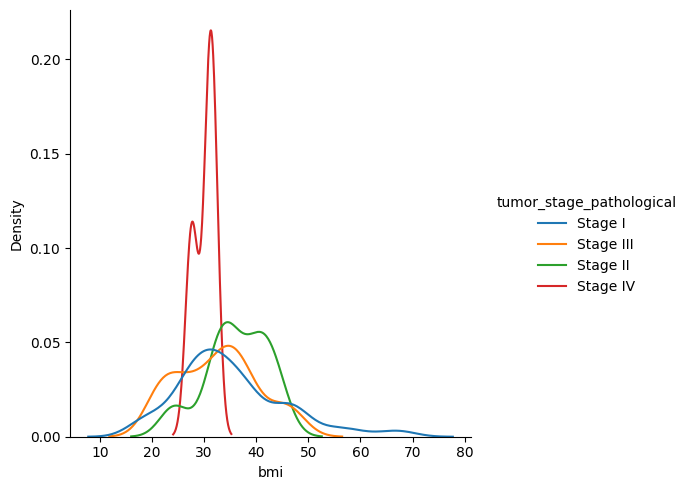

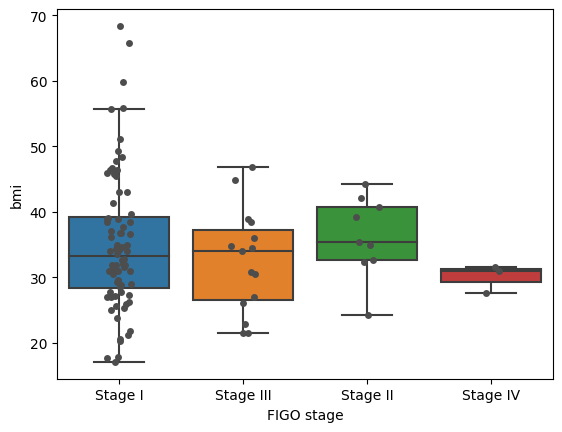

In [6]:
sns.displot(clinical_data, x="bmi", hue="tumor_stage_pathological", kind="kde", common_norm=False, bw_adjust=.7)
plt.show()

figoStrip = sns.boxplot(data=clinical_data, x="tumor_stage_pathological", y="bmi", showfliers=False)
figoStrip = sns.stripplot(data=clinical_data, x="tumor_stage_pathological", y="bmi", jitter=True, color=".3")
figoStrip.set(xlabel = "FIGO stage")
plt.show()

## Step 5: Plot other data

This technique can be applied to visualize any other variables in this dataset. As another example, let's examine the BMI distribution of subjects compared to their history of cancer:

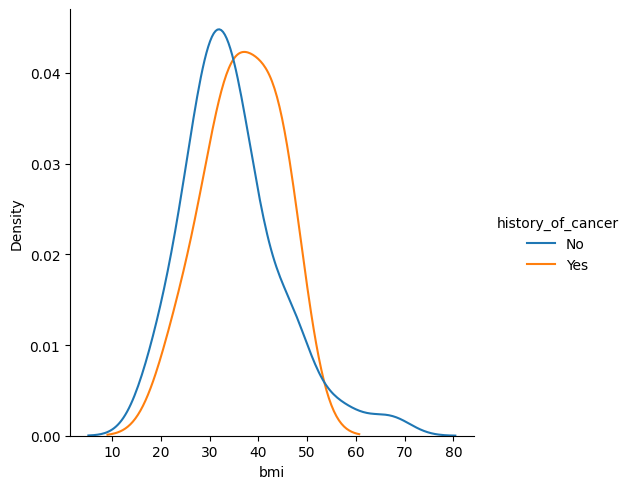

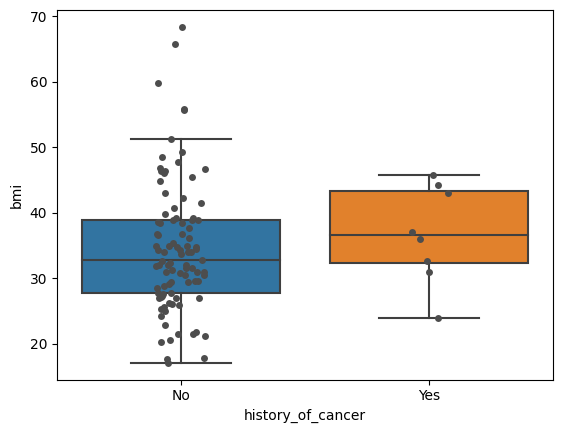

In [7]:
cancer_bmi = clinical_data[['history_of_cancer', 'bmi']]

sns.displot(cancer_bmi[cancer_bmi['history_of_cancer'] != "Unknown"], x="bmi", hue="history_of_cancer", kind="kde", common_norm=False)
plt.show()

diabetes_plot = sns.boxplot(data=cancer_bmi, x="history_of_cancer", y="bmi", showfliers=False)
diabetes_plot = sns.stripplot(data=cancer_bmi, x="history_of_cancer", y="bmi", jitter=True, color=".3")
plt.show()


These visualizations can help us see if there are significant differences in BMI distribution among patients with different histories of cancer, potentially revealing meaningful patterns and insights for further research.